# Load Data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw_df = pd.read_csv("../data/raw/diabetic_data.csv")
df = pd.read_csv("../data/processed/diabetes_clean.csv")

df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,diag_1_group,diag_2_group,diag_3_group,readmitted_flag
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,NO,Endocrine/Metabolic,NaN,NaN,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,No,Ch,Yes,>30,Endocrine/Metabolic,Endocrine/Metabolic,Endocrine/Metabolic,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,Yes,NO,Pregnancy,Endocrine/Metabolic,NaN,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,No,Ch,Yes,NO,Infectious Diseases,Endocrine/Metabolic,Circulatory,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,No,Ch,Yes,NO,Neoplasms,Neoplasms,Endocrine/Metabolic,0


# Describe Data

In [22]:
df.info()
df.describe(include="all").T



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,99493,5,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,NaN,NaN,NaN,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0


# Evaluate target variable of interest (readmission)

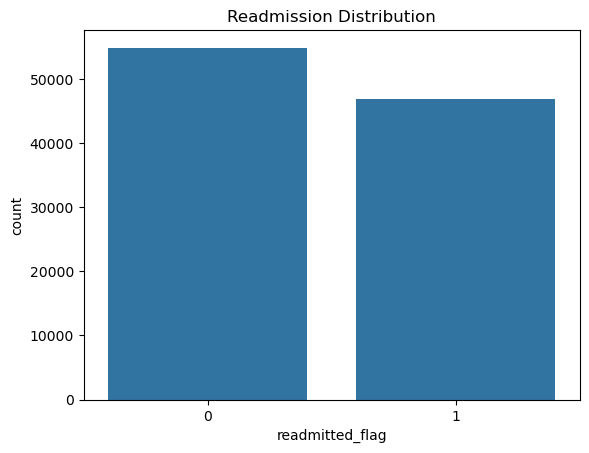

In [24]:
df['readmitted_flag'].value_counts(normalize=True)

sns.countplot(x='readmitted_flag', data=df)
plt.title("Readmission Distribution")
plt.show()



# Diagnosis Distribution

diag_1_group
Circulatory            30336
Endocrine/Metabolic    11459
Respiratory            10407
Digestive               9208
Symptoms                7636
Injury/Poisoning        6974
Genitourinary           5078
Musculoskeletal         4957
Neoplasms               3433
Infectious Diseases     2768
Skin                    2530
Mental Disorders        2262
Nervous System          1211
Blood Diseases          1103
Pregnancy                687
Congenital                51
Name: count, dtype: int64


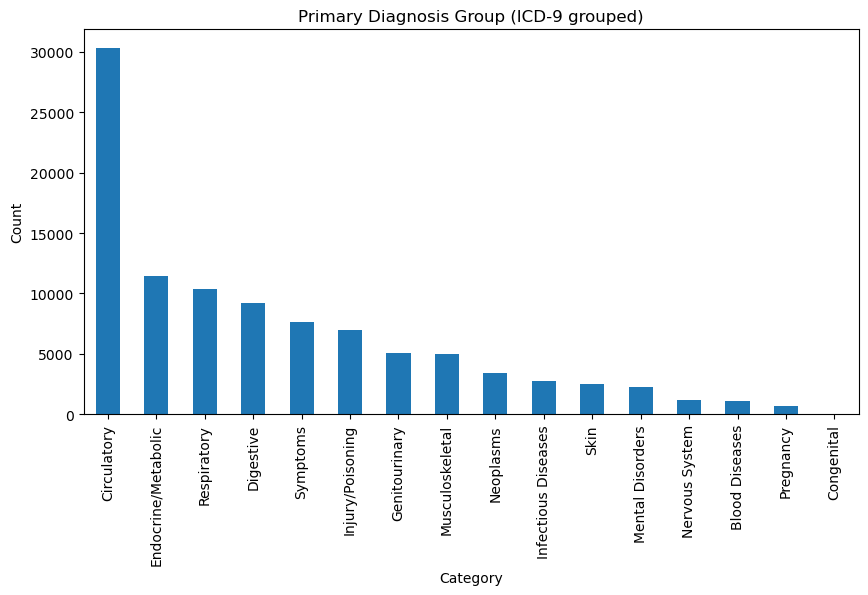

In [28]:
print(df["diag_1_group"].value_counts())

plt.figure(figsize=(10, 5))
df["diag_1_group"].value_counts().plot(kind="bar")
plt.title("Primary Diagnosis Group (ICD-9 grouped)")
plt.xlabel("Category")
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.show()


# Age Distribution

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64


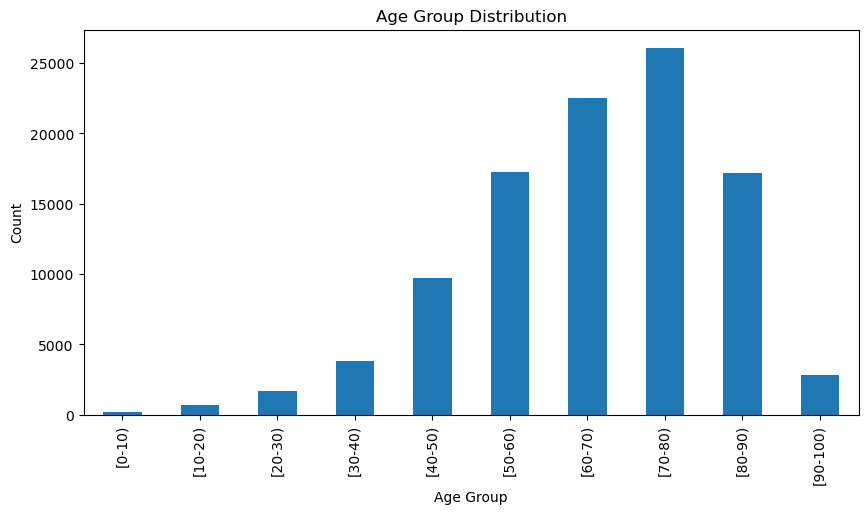

In [30]:
print(df["age"].value_counts())

plt.figure(figsize=(10, 5))
df["age"].value_counts().sort_index().plot(kind="bar")
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.show()


# Time in Hospital

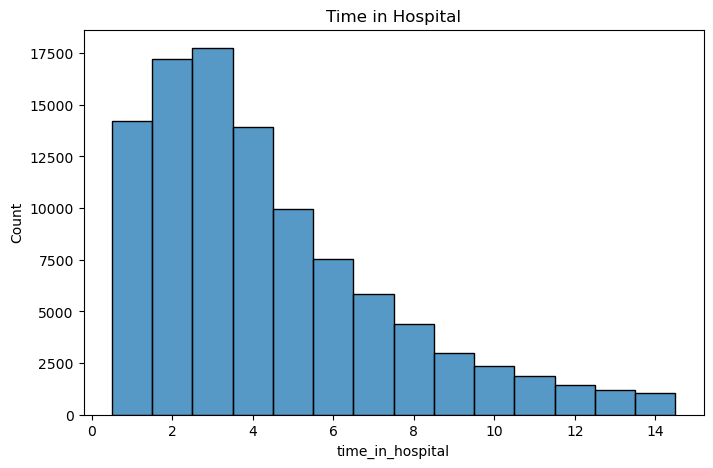

In [37]:
plt.figure(figsize=(8,5))
sns.histplot(df["time_in_hospital"], discrete=True)
plt.title("Time in Hospital")
plt.show()


# Lab Distribution

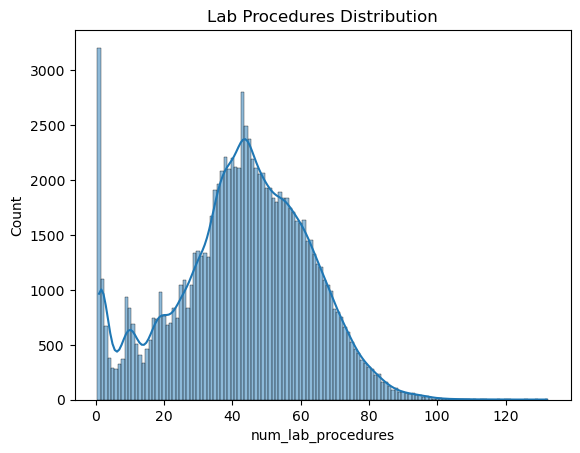

In [39]:
sns.histplot(df["num_lab_procedures"], discrete=True,kde=True)
plt.title("Lab Procedures Distribution")
plt.show()

# Race Distribution

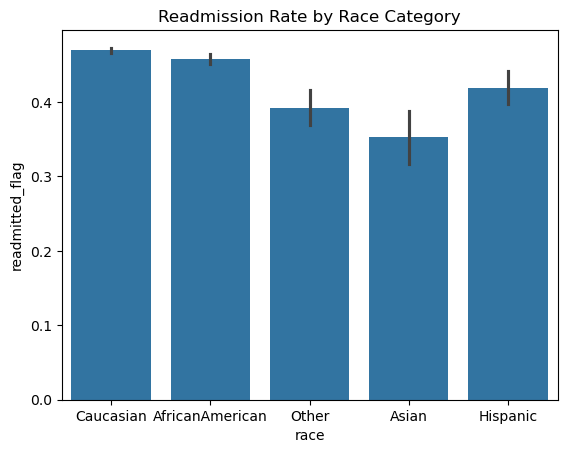

In [57]:
df.groupby("readmitted_flag")["race"].value_counts(normalize=True)
sns.barplot(x="race", y="readmitted_flag", data=df)
plt.title("Readmission Rate by Race Category")
plt.show()

# Inpatient and Outpatient Visits Distribution

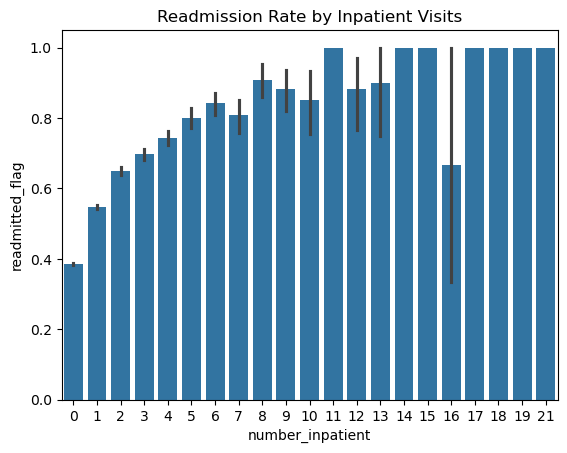

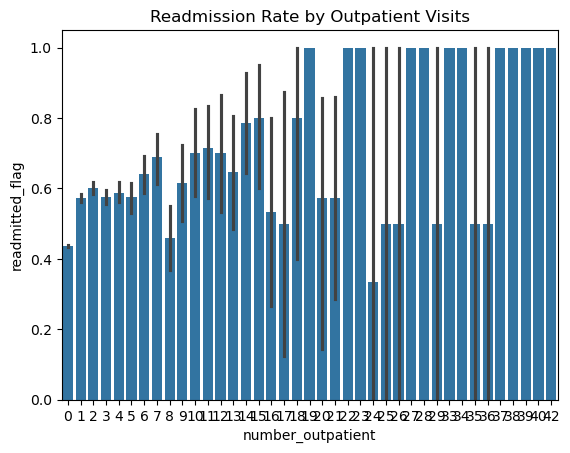

In [59]:
df.groupby("readmitted_flag")["number_inpatient"].value_counts(normalize=True)
sns.barplot(x="number_inpatient", y="readmitted_flag", data=df)
plt.title("Readmission Rate by Inpatient Visits")
plt.show()

df.groupby("readmitted_flag")["number_outpatient"].value_counts(normalize=True)
sns.barplot(x="number_outpatient", y="readmitted_flag", data=df)
plt.title("Readmission Rate by Outpatient Visits")
plt.show()

# Outlier Detection

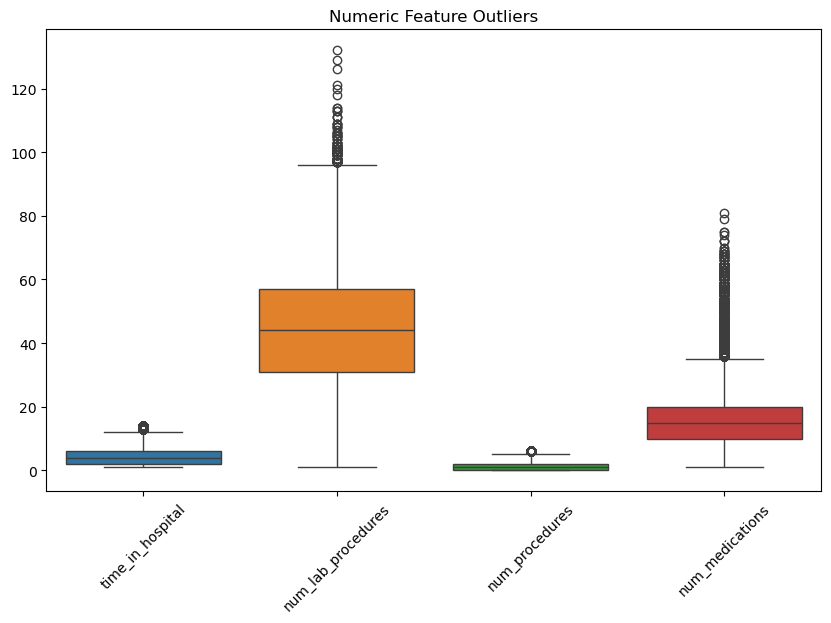

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[["time_in_hospital", "num_lab_procedures", "num_procedures", "num_medications"]])
plt.title("Numeric Feature Outliers")
plt.xticks(rotation=45)
plt.show()


# Correlation Matrix

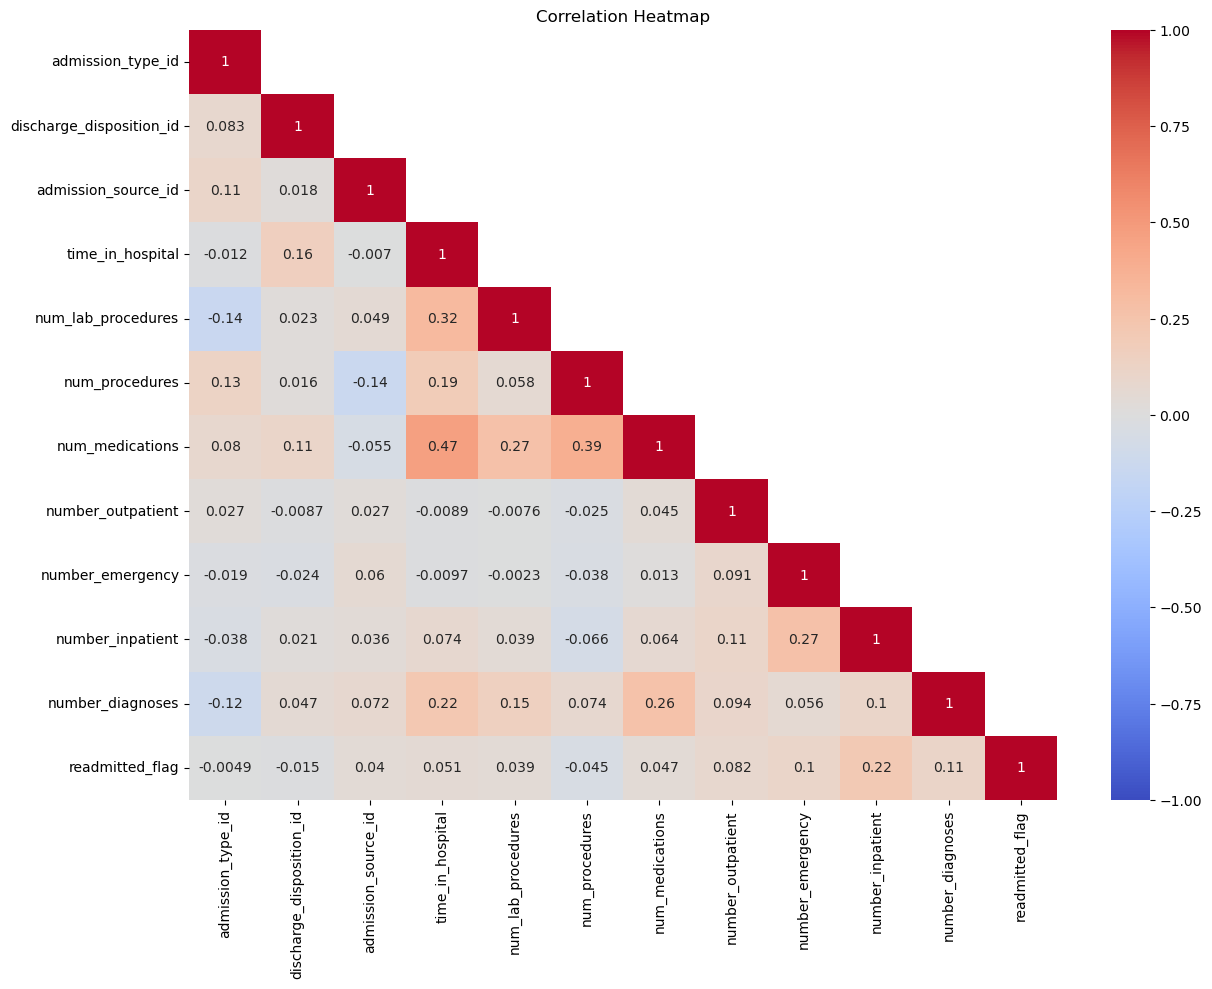

In [52]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.drop(columns=["encounter_id", "patient_nbr"], inplace=True)

mask = np.triu(np.ones_like(df_numeric.corr(), dtype=bool), k=1)

plt.figure(figsize=(14,10))
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", center=0, mask=mask)
plt.title("Correlation Heatmap")
plt.show()
